Trying out ideas and code snippets available in https://root.cern.ch/notebooks/HowTos/HowTo_ROOT-Notebooks.html (8/2/17)

# How to use ROOT in a Jupyter notebook
ROOT is integrated with the [Jupyter notebook](https://jupyter.org/) technology. There are two alternatives for using ROOT in a notebook:

1. [**Python flavour**](#python_flavor): the default language of the notebook is Python and ROOT is accessed via the PyROOT interface. The user can mark cells to be C++ with the **%%cpp** magic.
2. [**C++ flavour**](#cpp_flavor): the notebook is entirely written in C++, thus emulating the ROOT C++ prompt.


<a id='python_flavor'></a>
# Python Flavor
In order to use ROOT in a Python notebook, we first need to import the ROOT module. During the import, all notebook related functionalities are activated.

In [1]:
import ROOT

Welcome to JupyROOT 6.10/04


Now we are ready to use [PyROOT](https://root.cern.ch/how/how-use-pyroot-root-python-bindings). For example, we create a histogram.

In [2]:
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
h.FillRandom("gaus")

Next we create a [canvas](https://root.cern.ch/root/htmldoc/TCanvas.html), the entity which holds graphics primitives in ROOT.

In [3]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()

For the histogram to be displayed in the notebook, we need to draw the canvas.

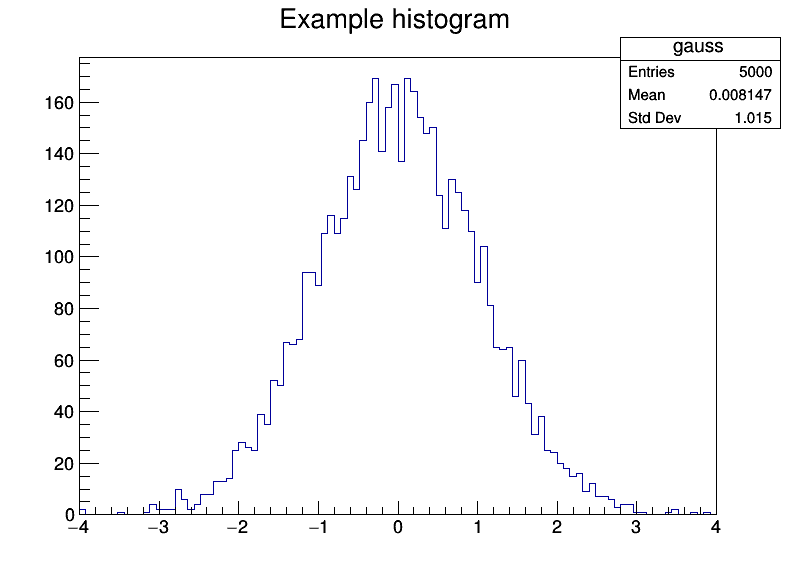

In [4]:
c.Draw()

It is not active by default yet, but Javascript visualisation can be activated for testing purposes. The plot below will be interactive: click on it and discover the [JSROOT](https://root.cern.ch/js/) capabilities!

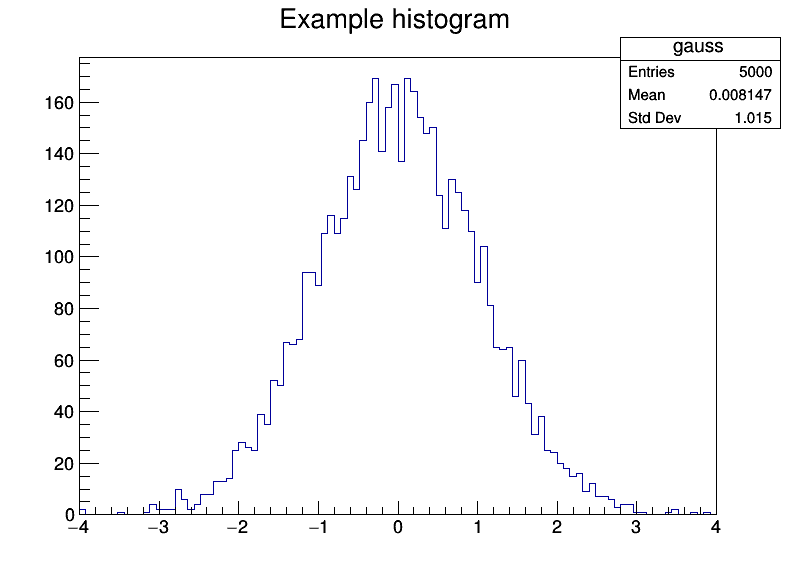

In [5]:
ROOT.enableJSVis()
c.Draw()
ROOT.disableJSVis()

**kpNote:** The plot showed up the interactive feature didn't. I guess the JSROOT is not installed (I haven't installed JSROOT separately yet - tried brew install but didn't work). Initially, I assumed JSROOT comes with ROOT6 installation.

## Interleave Python with C++: the %%cpp magic

Thanks to ROOT, it is possibile to write cells in C++ within a Python notebook. This can be done using the %%cpp [magic](https://ipython.org/ipython-doc/3/interactive/reference.html#magic-command-system). Magics are a feature of Jupyter notebooks and when importing the ROOT module, the %%cpp magic was registered.


In [6]:
%%cpp
cout << "This is a C++ cell using the %%cpp magic." <<endl;

This is a C++ cell using the %%cpp magic.


Not bad. On the other hand, ROOT offers much more than this. Thanks to its type system, entities such as functions, classes and variables, created in a C++ cell, can be accessed from within Python.

In [7]:
%%cpp
class A{
    public:
    A(){cout << "Constructor of A!" << endl;}
};

In [8]:
a = ROOT.A()

Constructor of A!


The Python and C++ worlds are so entangled that we can find back in C++ the entities created in Python. To illustrate this, from within a C++ cell, we are going to fit a function in the gauss histogram displayed above and then re-draw the canvas.

 FCN=65.0502 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=9.21369e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.57425e+02   2.76819e+00   8.89596e-03  -5.39870e-04
   2  Mean         1.38321e-02   1.43799e-02   5.69927e-05   8.22303e-04
   3  Sigma        1.00178e+00   1.04857e-02   1.11224e-05  -4.31183e-01


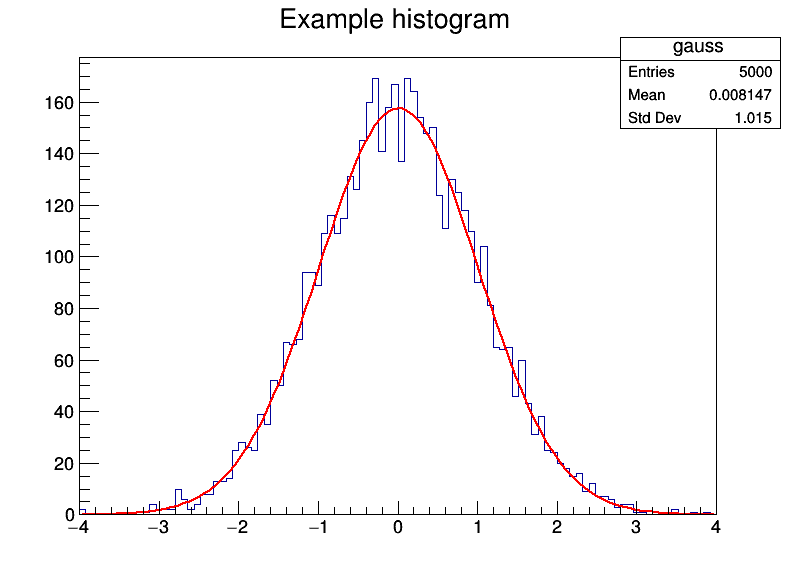

In [9]:
%%cpp
gauss->Fit("gaus", "S");
myCanvasName->Draw();

Complete interoperability is possible. Let's move now to the options offered by the **%%cpp** magic.

### The options of the %%cpp magic

The **%%cpp** magic accepts two options: -d and -a. Their documentation can be seen by typing:

In [10]:
%%cpp?

A window will appear at the bottom of the page, showing the documentation.

### ACliC

The first option (-a) allows to compile the cell code with ACLiC. This is not so relevant for performance since the ROOT interpreter just in time compiles the C++ code. Nevertheless, ACLiC is most useful when the automatic creation of dictionaries is required, for example in presence of I/O operations.


In [11]:
%%cpp -a
class CompileMe {
public:
    CompileMe() {}
    void run() {}
};

Info in <TMacOSXSystem::ACLiC>: creating shared library /Users/kpadhikari/Desktop/BigFls/CLAS12/GitProj/KPAdhikari/PythonStuff/ROOT_Notebooks/64a4a5eb_C.so


Let's verify that the dictionary is there:

In [12]:
ROOT.TClass.GetClass("CompileMe").HasDictionary()

True

Note that the previously created class A has no dictionary.

In [13]:
ROOT.TClass.GetClass("A").HasDictionary()

False

### Declaration of functions

The second option (-d) needs to be used when declaring functions. The [interpreter (kp: cling)](https://root.cern.ch/cling) cannot yet detect function declarations by itself: we need to be explicit. This is a limitation which will be lifted in the near future.

In [14]:
%%cpp -d
void f() {
    cout << "This is function f" << endl;
}

As usual, function f can also be accessed from Python.

In [15]:
print "This is again Python"
ROOT.f()

This is again Python
This is function f


<a id='cpp_flavor'></a>
## C++ flavour

ROOT allows to run pure C++ notebooks.

This can be achieved in two ways:

1. When choosing to instantiate that kernel, the user is presented with a fully-C++ notebook
2. Switching to C++ programmatically

The manual switch to C++ mentioned above can be done by typing:


In [26]:
ROOT.toCpp()

AttributeError: toCpp

Now our notebook behaves as the ROOT prompt, with no need of any magic.

In [18]:
cout << "From this point on..." << endl;

NameError: name 'cout' is not defined

In [19]:
cout << "... it's only C++ ..." << endl;

NameError: name 'cout' is not defined

In [20]:
cout << "... With the usual goodies!" << endl;
std::unordered_map<int, string> m = {{1, "one"}, {2, "two"}, {3, "three"}}

SyntaxError: invalid syntax (<ipython-input-20-ff6bd5ab8d87>, line 2)

Remember our C++ function f? ROOT does!

In [21]:
f

NameError: name 'f' is not defined

### "Magics"

We put the title in quotes because as for to the Python flavour, the C++ flavour also provides the ACLiC and Declare options. In order to use them, the first line in the cell must contain the word **.cpp** followed by the option.


In [22]:
.cpp -a
class CompileMe2 {
public:
    CompileMe2() {}
    void run() {}
};

SyntaxError: invalid syntax (<ipython-input-22-49438051b444>, line 1)

In [23]:
.cpp -d
void f2() {
    cout << "This is function f" << endl;
}

SyntaxError: invalid syntax (<ipython-input-23-13cca073c9c5>, line 1)

In [24]:
auto cm2 = CompileMe2()

SyntaxError: invalid syntax (<ipython-input-24-6653e78a5aac>, line 1)

In [25]:
f2()

NameError: name 'f2' is not defined